## Plotting Gyro relations

I'm going to quickly overplot the Gyrochronology relations (not considering critical Rossby Number cutoff) presented in Angus et al. 2015.

These are those reported in Barnes (2007), Mamajek & Hillenbrand (2008) and Angus et al (2015).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mystyle
plt.style.use(mystyle.ms)

ati = pd.read_csv('../../data/atium.csv',index_col=0)

#Exclude those stars with a Rhat > 1.1 flag and no results otherwise
ati = ati[np.isfinite(ati.nus.values)]
ati = ati[ati.flag != 'rhat_1' ]
print('We have {} stars'.format(len(ati)))

We have 78 stars


$P = \tau^n \times a(B - V - c)^b$

We will calcluated $B-V$ from *Gaia* $BP-RP$ using the following:

$BP-RP = -0.01146 + 1.315(B-V) - 0.1103(B-V)^2$

In [52]:
barnes = [0.7725, 0.601, 0.4, 0.5189]
mamajek = [0.409, 0.325, 0.495, 0.566]
angus = [0.40, 0.31, 0.45, 0.55]

In [53]:
def gyro(tau, bv, a, b, c, n):
    return tau**n * a*(bv - c)**b

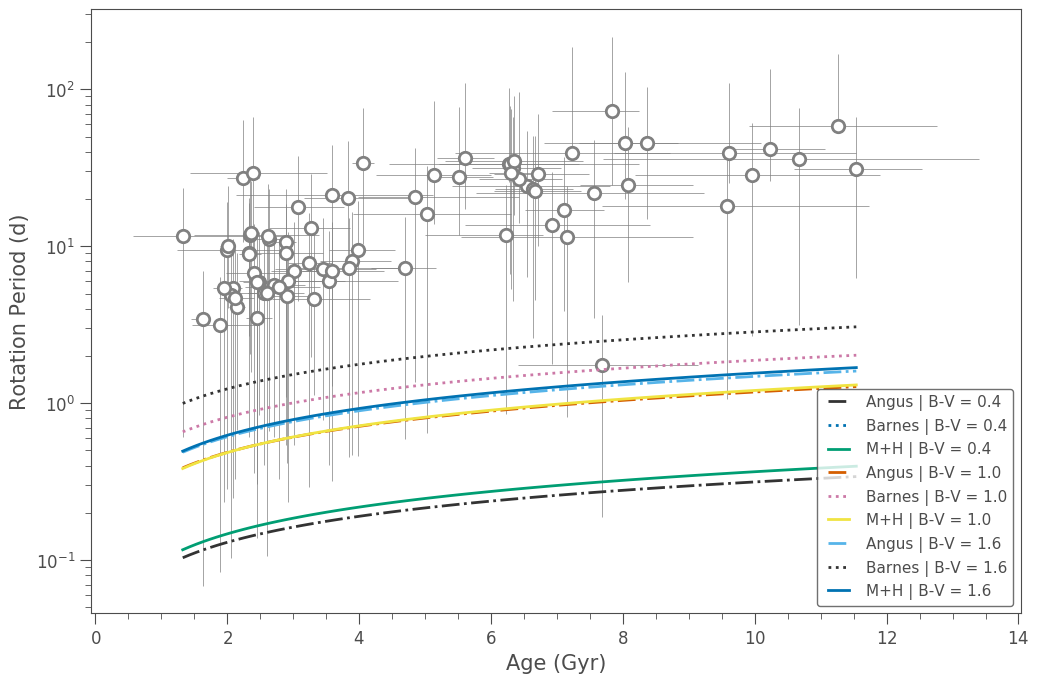

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
c = ax.scatter(ati.age, ati.P, lw=2, ec='grey', c='white',s=80, zorder=2)
plt.errorbar(ati.age, ati.P, xerr=[ati.loage, ati.upage], yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')


tau = np.linspace(ati.age.min(), ati.age.max(), 100)
for bv in [0.4, 1., 1.6]:
    plt.plot(tau, gyro(tau, bv, *angus), lw=2, ls='-.', label='Angus | B-V = {}'.format(bv))
    plt.plot(tau, gyro(tau, bv, *barnes), lw=2, ls=':', label='Barnes | B-V = {}'.format(bv))
    plt.plot(tau, gyro(tau, bv, *mamajek), lw=2, ls='-', label='M+H | B-V = {}'.format(bv))

    
ax.set_axisbelow(True)
ax.set_xlabel('Age (Gyr)')
ax.set_ylabel('Rotation Period (d)')
ax.set_yscale('log')
ax.legend(loc='lower right')
# fig.colorbar(c,label=r'$BP-RP$')
plt.show()



### Looks like something is off about my rotation periods!